In [1]:
from pyecharts.charts import Geo
import operator as op
from faker import Faker
import pyecharts
f=Faker(locale='zh_CN')
print(pyecharts.__version__)

1.0.0


In [2]:
def all_list(arr):
    result = {}
    for i in set(arr):
        result[i] = arr.count(i)
    return result

In [3]:
# 读取城市数据
city = []
with open(r'E:\BaiduNetdiskDownload\project\spider\xiebuyazheng\data\target.txt',mode = 'r',encoding='utf-8') as f:
    rows = f.readlines()
    for row in rows:
        if len(row.split(',')) == 5:
            city.append(row.split(',')[2].replace('\n',''))

In [4]:
data = []
for item in all_list(city):
    data.append((item,all_list(city)[item]))


name = []
number = []
for item in data:
    if op.eq(item[0],""):
        continue
    name.append(item[0])
    number.append(item[1])
name
data

[('', 4),
 ('西安', 22),
 ('南平', 1),
 ('海东', 1),
 ('深圳', 40),
 ('佛山', 8),
 ('高碑店', 1),
 ('任丘', 1),
 ('阳泉', 1),
 ('武威', 1),
 ('汉中', 1),
 ('准格尔旗', 1),
 ('株洲', 1),
 ('中牟', 2),
 ('桦川县', 1),
 ('厦门', 2),
 ('辽源', 3),
 ('普宁', 1),
 ('石家庄', 9),
 ('北京', 56),
 ('新乡', 2),
 ('北海', 1),
 ('常山', 1),
 ('抚顺', 1),
 ('南宁', 10),
 ('玉林', 1),
 ('淮北', 1),
 ('伊宁', 2),
 ('如皋', 1),
 ('茂名', 2),
 ('昆明', 9),
 ('桃源', 1),
 ('永嘉县', 1),
 ('徐州', 6),
 ('洛阳', 7),
 ('象山', 1),
 ('长兴', 1),
 ('三河', 3),
 ('安阳', 1),
 ('咸宁', 4),
 ('绍兴', 2),
 ('西宁', 1),
 ('江阴', 3),
 ('黄冈', 1),
 ('东营', 1),
 ('沭阳', 1),
 ('盘锦', 1),
 ('长春', 7),
 ('六安', 1),
 ('焦作', 3),
 ('湘潭', 2),
 ('烟台', 2),
 ('天津', 13),
 ('梧州', 1),
 ('杭州', 7),
 ('海盐', 1),
 ('宜宾', 1),
 ('平湖', 1),
 ('昆山', 2),
 ('恩施', 1),
 ('宜兴', 1),
 ('温岭', 1),
 ('丹东', 1),
 ('平阳', 1),
 ('云阳', 1),
 ('江山', 1),
 ('太仓', 1),
 ('四平', 1),
 ('延边', 2),
 ('通辽', 1),
 ('临潼', 1),
 ('来宾', 2),
 ('南充', 3),
 ('锦州', 6),
 ('三门峡', 1),
 ('平凉', 1),
 ('云浮', 1),
 ('自贡', 1),
 ('商丘', 4),
 ('庆阳', 1),
 ('绵阳', 1),
 ('临沂', 7),
 ('兰陵'

In [5]:
from example.commons import Faker
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.globals import ChartType, SymbolType


def geo_base() -> Geo:
    c = (
        Geo()
        .add_schema(maptype="china")
        .add("geo",[list(z) for z in zip(name,number)])
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(),
            title_opts=opts.TitleOpts(title="Geo-基本示例"),
        ))
    return c

geo_base().render_notebook()

TypeError: 'NoneType' object is not iterable

In [39]:
import pickle
from os import path
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

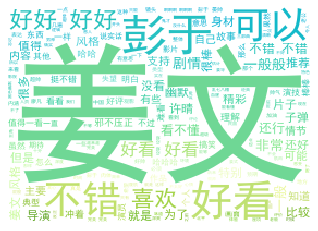

In [71]:
comment = []
with open(r'E:\BaiduNetdiskDownload\project\spider\xiebuyazheng\data\target.txt',mode = 'r',encoding='utf-8') as f:
# with open(r'E:\BaiduNetdiskDownload\project\spider\xiebuyazheng\data\xie_zheng.txt',mode = 'r',encoding='utf-8') as f:
    rows = f.readlines()
    for row in rows:
        if len(row.split(',')) == 5:
            comment.append(row.split(',')[4].replace('\n',''))
            
comment_after_split = jieba.cut(str(comment),cut_all=False)  
wl_space_split= " ".join(comment_after_split)

backgroud_Image = plt.imread(r'E:\BaiduNetdiskDownload\project\spider\xiebuyazheng\data\1.jpg') 

stopwords = STOPWORDS.copy()

#可以加多个屏蔽词
stopwords.add("电影")
stopwords.add("一部")
stopwords.add("一个")
stopwords.add("没有")
stopwords.add("什么")
stopwords.add("有点")
stopwords.add("这部")
stopwords.add("这个")
stopwords.add("不是")
stopwords.add("真的")
stopwords.add("感觉")
stopwords.add("觉得")
stopwords.add("还是")

# 设置词云参数
#参数分别是指定字体、背景颜色、最大的词的大小、使用给定图作为背景形状 
wc = WordCloud(width=280,height=200,background_color='white',
	mask=backgroud_Image,font_path="C:\simhei.ttf",
	stopwords=stopwords,max_font_size=200,
	random_state=50)
wc.generate_from_text(wl_space_split)
img_colors= ImageColorGenerator(backgroud_Image)
wc.recolor(color_func=img_colors)
plt.imshow(wc)
plt.axis('off')#不显示坐标轴  
plt.show()

In [76]:
from pyecharts.charts import ThemeRiver
from pyecharts.charts import Pie

In [81]:
rate = []

with open(r'E:\BaiduNetdiskDownload\project\spider\xiebuyazheng\data\target.txt',mode='r',encoding='utf-8') as f:
	rows = f.readlines()
	for row in rows:
		if len(row.split(',')) == 5:
			rate.append(row.split(',')[3].replace('\n',''))


print(rate.count('5')+rate.count('4.5'))
print(rate.count('4')+rate.count('3.5'))
print(rate.count('3')+rate.count('2.5'))
print(rate.count('2')+rate.count('1.5'))
print(rate.count('1')+rate.count('0.5'))


#饼状图

attr = ["五星", "四星", "三星", "二星", "一星"]


#分别代表各星级评论数

v1 = [3324,1788,1293,553,1653]
def pie_base() -> Pie:
    c = (
        Pie()
        .add("7-17", [list(z) for z in zip(attr, v1)])
        .set_global_opts(title_opts=opts.TitleOpts(title="饼图-星级玫瑰图示例"))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    )
    return c

pie_base().render_notebook()

500
322
133
29
22
